https://www.kaggle.com/shilpibhattacharyya/friends-sitcom-dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
dp = [
    "#1c1c3c",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

In [3]:
df = pd.read_csv("../../../data/friends_dataset.csv")

In [4]:
df

,Unnamed: 0,Location,Scene,Season,Speaker,Text
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?"
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g..."
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!
...,...,...,...,...,...,...
93330,93330,Camera fades to one of the band members playin...,"The chapel is full of guest, A groomsmen esco...",4,Chandler,What we did last night was....
93331,93331,Monica and Chandler's apartment,Chandler is watching TV and Monica is cooking,10,Chandler,I'm telling ya! It's gonna happen. Next year i...
93332,93332,Monica and Rachel's,"everyone is sitting around the kitchen table,...",1,Ross,Yeah.
93333,93333,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Ross,What are you doing?


In [11]:
df_lugares = df.groupby("Location")["Season"].count().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().head(10)

In [12]:
df_lugares

,Location,cuenta
0,Central Perk,16873
1,Monica and Rachel's,15722
2,Monica and Chandler's,5314
3,Chandler and Joey's,3837
4,Joey and Rachel's,3024
5,Monica,2558
6,Monica and Chandler's apartment,1750
7,Joey and Rachel's apartment,1094
8,Ross's apartment,990
9,Monica and Rachel's erm,942


In [5]:
df_grouped = df.groupby("Speaker")["Season"].count().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().head(10)

In [6]:
df_grouped

,Speaker,cuenta
0,Rachel,17058
1,Ross,16672
2,Chandler,15389
3,Monica,15353
4,Joey,15235
5,Phoebe,13628


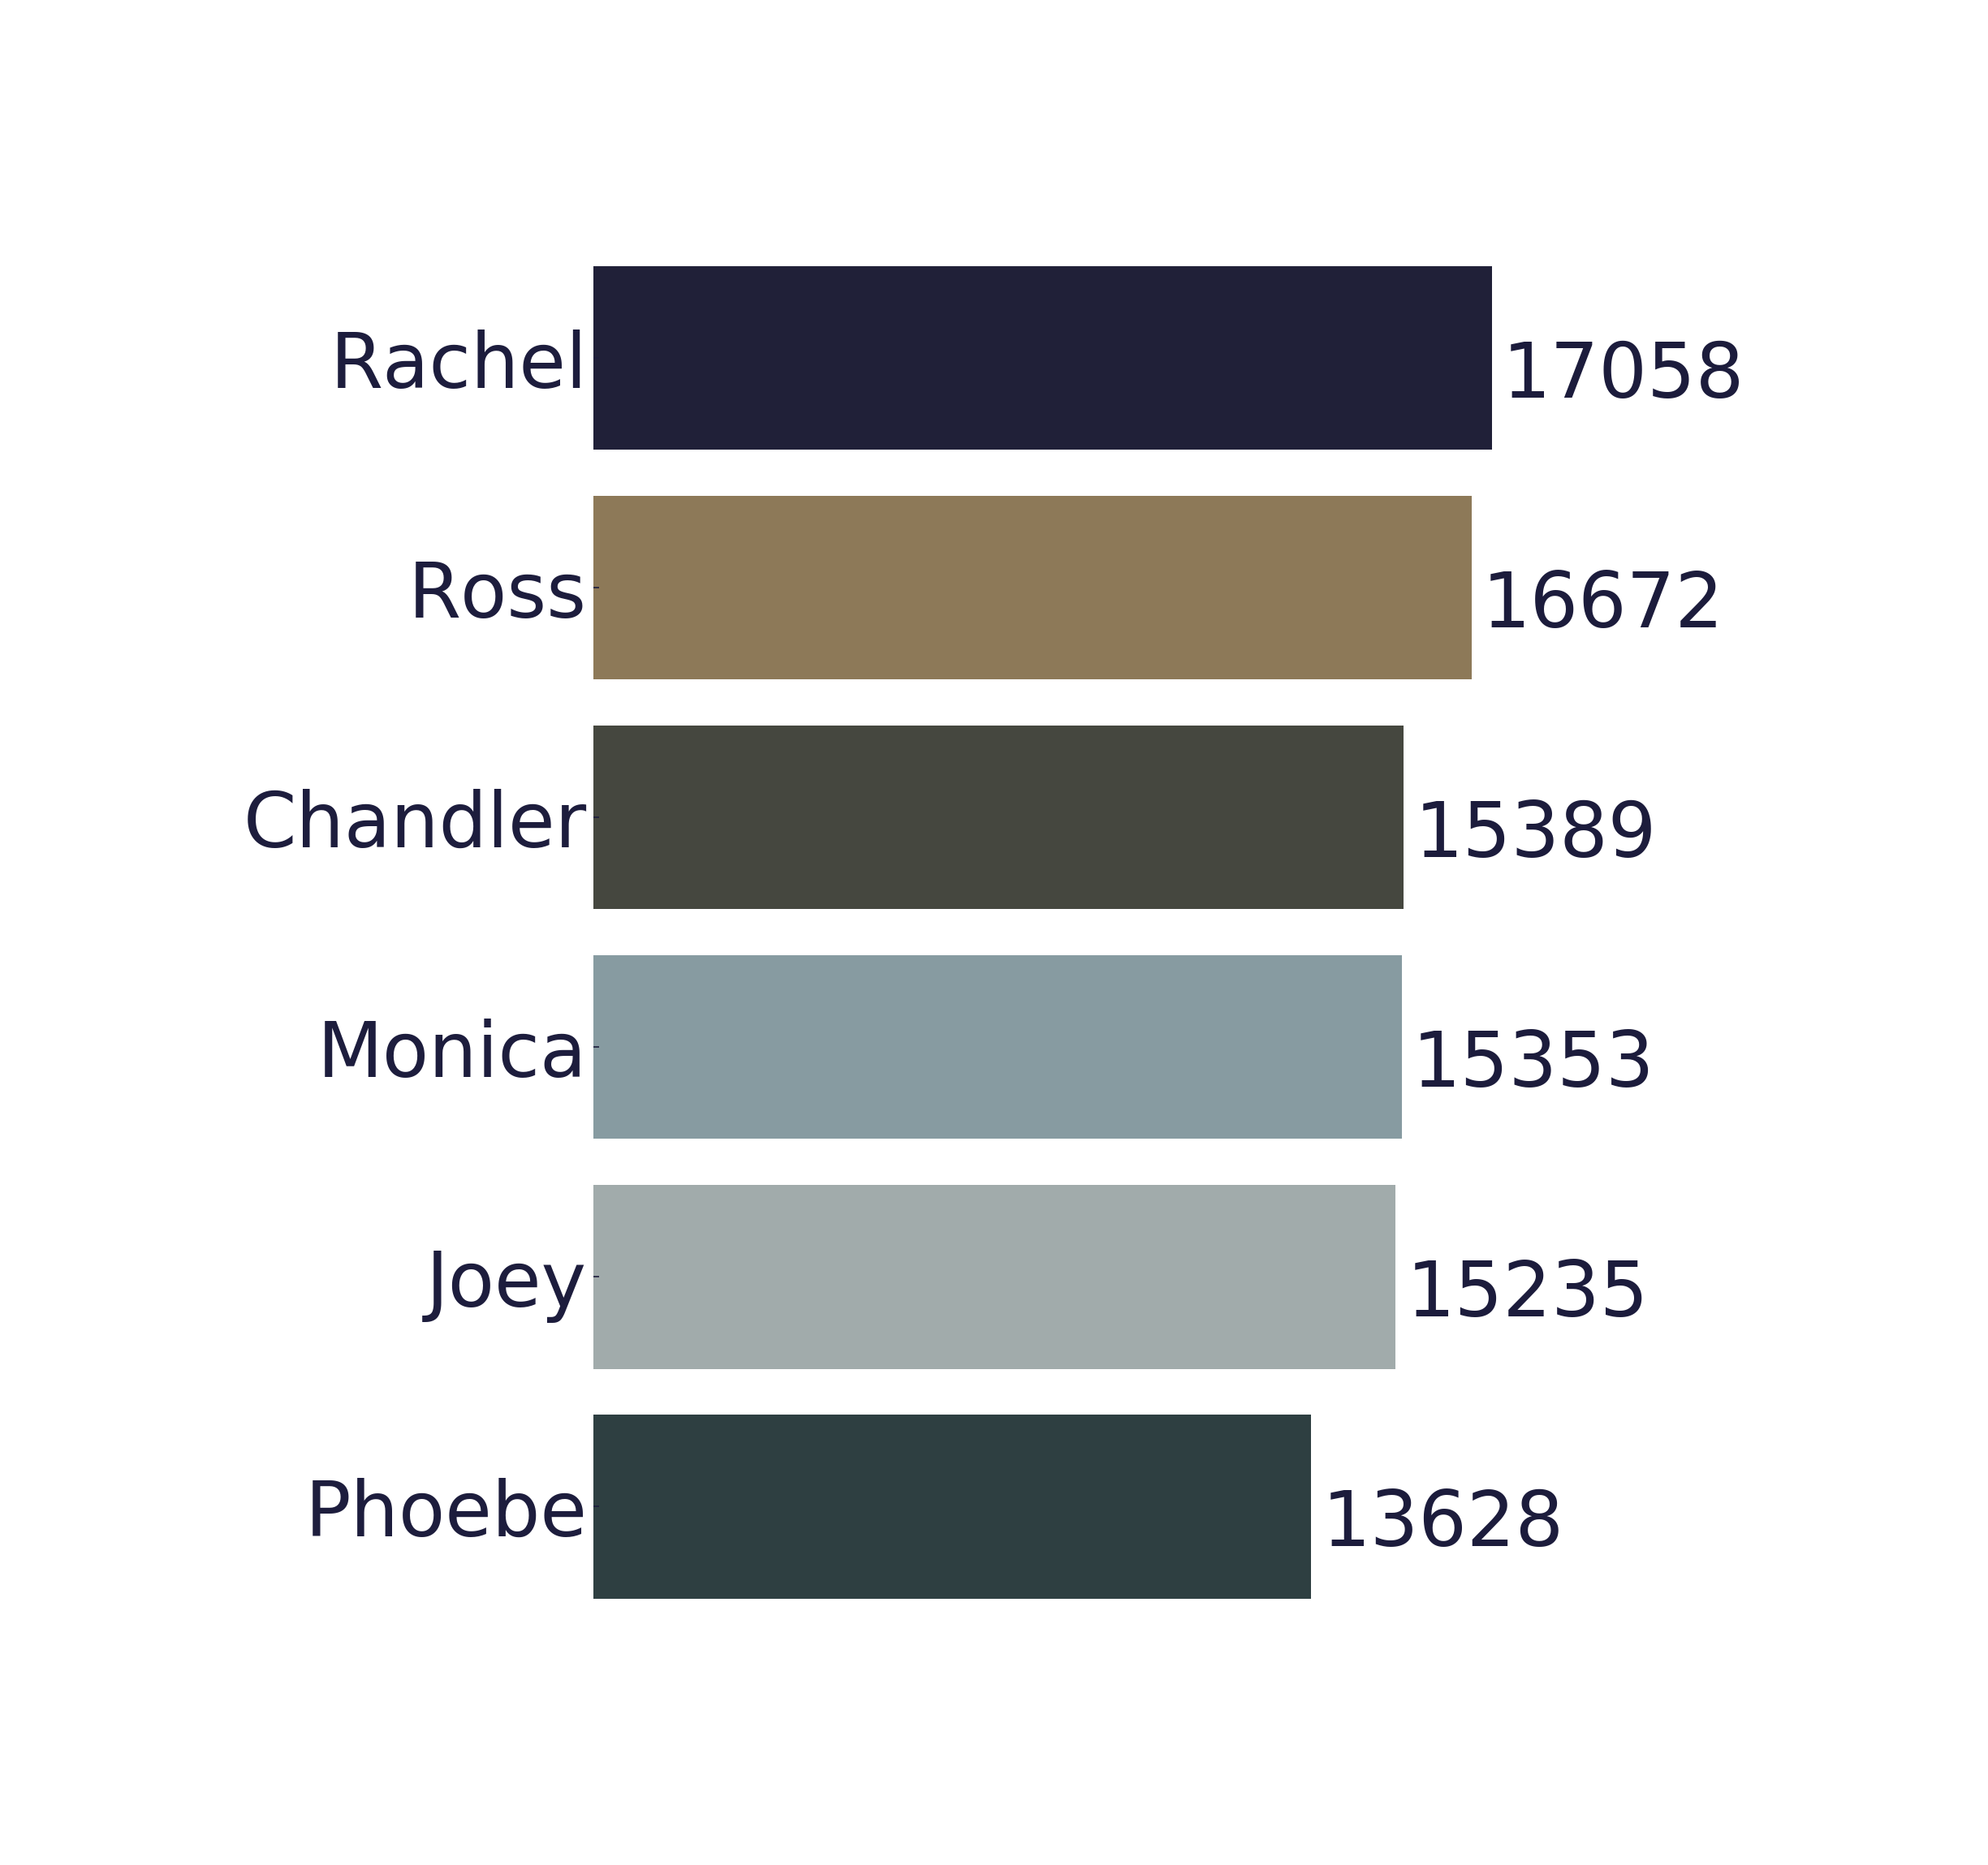

In [10]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Speaker", x="cuenta", orient="h", data=df_grouped, palette = dp)
plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)



# jugar con estos valores
vertical_offset = 0.17
horizontal_offset = 2500

ax.tick_params(axis='both', which='major', labelsize=45)
for index, row in df_grouped.head(10).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#1c1c3c', 
            ha="center", 
            size=45)
    
plt.savefig(f'personajes_friends_mas_hablan.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()